[View in Colaboratory](https://colab.research.google.com/github/attrigirish/python-ml/blob/master/Stock_Prediction.ipynb)

# Stock Market Prediction App 

**Download Quandl**

In [0]:
#Installing External Modules

!pip install -q Quandl


**Importing Sample Data (HDFC Bank Pvt Ltd)**

In [3]:
#Quandl : NSE/HDFCBANK
#URL : https://www.quandl.com/data/NSE/HDFCBANK-HDFC-Bank-Limited 

import pandas as pd
import quandl

df = quandl.get("NSE/HDFCBANK")

print(df.head())

             Open   High    Low   Last  Close  Total Trade Quantity  \
Date                                                                  
1998-03-20  70.00  75.40  70.00    NaN    NaN                   NaN   
1998-03-23  74.95  74.95  72.50  73.05  73.05               26700.0   
1998-03-24  75.95  76.00  72.75  73.50  73.25              374200.0   
1998-03-25  75.25  76.90  74.40  76.00  76.50              222800.0   
1998-03-26  76.50  76.80  73.00  73.50  73.70              215400.0   

            Turnover (Lacs)  
Date                         
1998-03-20              NaN  
1998-03-23            19.60  
1998-03-24           277.32  
1998-03-25           168.59  
1998-03-26           160.71  


**Filtering Data/Cleaning Data**

In [4]:
df=df[ ["Open","High","Low","Close","Total Trade Quantity"] ]

print(df.head())

             Open   High    Low  Close  Total Trade Quantity
Date                                                        
1998-03-20  70.00  75.40  70.00    NaN                   NaN
1998-03-23  74.95  74.95  72.50  73.05               26700.0
1998-03-24  75.95  76.00  72.75  73.25              374200.0
1998-03-25  75.25  76.90  74.40  76.50              222800.0
1998-03-26  76.50  76.80  73.00  73.70              215400.0


**Inferring Meaningful Data from Existing Information**

In [0]:
#High/Low Percentage - Variance between daily high and low values
df['HL_PCT'] = (df['High'] - df['Low']) / df['Close'] * 100.0

#Percentage Change - Change in percentage in the stock price from last closing price
df['PCT_change'] = (df['Close'] - df['Open']) / df['Open'] * 100.0

**Further Cleaning Data**

In [6]:
df = df[['Close', 'HL_PCT', 'PCT_change', 'Total Trade Quantity']]

print(df.head())

            Close    HL_PCT  PCT_change  Total Trade Quantity
Date                                                         
1998-03-20    NaN       NaN         NaN                   NaN
1998-03-23  73.05  3.353867   -2.535023               26700.0
1998-03-24  73.25  4.436860   -3.554970              374200.0
1998-03-25  76.50  3.267974    1.661130              222800.0
1998-03-26  73.70  5.156038   -3.660131              215400.0


**Features and Labels**

What are the features and what is the label?

We're trying to predict the price, so is price the label? If so, what are the featuers? When it comes to forecasting out the price, our label, the thing we're hoping to predict, is actually the future price. As such, our features are actually: current price, high minus low percent, and the percent change volatility.

In [7]:
import math

forecast_col = 'Close'
df.fillna(value=-99999, inplace=True)
forecast_out = int(math.ceil(0.01 * len(df)))
df['Future_Price'] = df[forecast_col].shift(-forecast_out)
print(df.head())

               Close        HL_PCT    PCT_change  Total Trade Quantity  \
Date                                                                     
1998-03-20 -99999.00 -99999.000000 -99999.000000              -99999.0   
1998-03-23     73.05      3.353867     -2.535023               26700.0   
1998-03-24     73.25      4.436860     -3.554970              374200.0   
1998-03-25     76.50      3.267974      1.661130              222800.0   
1998-03-26     73.70      5.156038     -3.660131              215400.0   

            Future_Price  
Date                      
1998-03-20         66.65  
1998-03-23         63.60  
1998-03-24         66.05  
1998-03-25         63.75  
1998-03-26         63.00  


**Checking for NaN**

In [8]:
df=df.dropna()
print(df.head())

               Close        HL_PCT    PCT_change  Total Trade Quantity  \
Date                                                                     
1998-03-20 -99999.00 -99999.000000 -99999.000000              -99999.0   
1998-03-23     73.05      3.353867     -2.535023               26700.0   
1998-03-24     73.25      4.436860     -3.554970              374200.0   
1998-03-25     76.50      3.267974      1.661130              222800.0   
1998-03-26     73.70      5.156038     -3.660131              215400.0   

            Future_Price  
Date                      
1998-03-20         66.65  
1998-03-23         63.60  
1998-03-24         66.05  
1998-03-25         63.75  
1998-03-26         63.00  


**Scaling Data**

In [9]:
import numpy as np
from sklearn import preprocessing

#Creating Features Set
X = np.array(df.drop(['Future_Price'], 1))

X = preprocessing.scale(X)
X_lately = X[-forecast_out:]
X = X[:-forecast_out]

df.dropna(inplace=True)


#Creating Label
y = np.array(df['Future_Price'])
y = y[:-forecast_out]


print(X[:5])
print(y[:5])

[[-6.51175524e+01 -7.09928627e+01 -7.09928708e+01 -6.11533577e-01]
 [-4.78755963e-01  1.42545320e-02  1.23040109e-02 -5.45210439e-01]
 [-4.78626778e-01  1.50235159e-02  1.15797701e-02 -3.63304578e-01]
 [-4.76527530e-01  1.41935431e-02  1.52836019e-02 -4.42557952e-01]
 [-4.78336113e-01  1.55341714e-02  1.15050982e-02 -4.46431631e-01]]
[66.65 63.6  66.05 63.75 63.  ]


**Training and Testing Data Sets**

In [10]:
from sklearn import cross_validation

X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.2)
print(X_train[-5:])

[[-0.37967144  0.01594937  0.01331338 -0.48540241]
 [-0.48976894  0.0147894   0.01714537 -0.44904898]
 [-0.42598409  0.01497027  0.01505735 -0.01720185]
 [-0.36148872  0.01527556  0.0140205  -0.50644538]
 [ 0.09107693  0.01376856  0.01564194 -0.08434213]]


**Creating Classifier/Model**

In [11]:
from sklearn.linear_model import LinearRegression


clf = LinearRegression()


clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)

print(accuracy)

0.875972753261584


**Forecasting**

In [12]:
forecast_set = clf.predict(X_lately)

print(forecast_set[:5])
print(forecast_set[-5:])

[1800.53426035 1852.07563805 1846.09200913 1844.38124708 1879.32986794]
[2126.69308721 2072.30769418 2109.76283973 2022.045704   2005.96302093]


**Visualizing the Information**

              Close    HL_PCT  PCT_change  Total Trade Quantity  Future_Price  \
Date                                                                            
2018-05-02  1969.50  1.624778    1.000000             1775012.0       2165.95   
2018-05-03  1967.90  1.468571   -0.007622             1038193.0       2180.90   
2018-05-04  1988.50  1.191853    0.939086             1720359.0       2168.85   
2018-05-07  1977.40  0.622029   -0.214468             1316032.0       2176.75   
2018-05-08  1967.05  1.286190   -0.616395             1775141.0       2176.20   

            Forecast  
Date                  
2018-05-02       NaN  
2018-05-03       NaN  
2018-05-04       NaN  
2018-05-07       NaN  
2018-05-08       NaN  


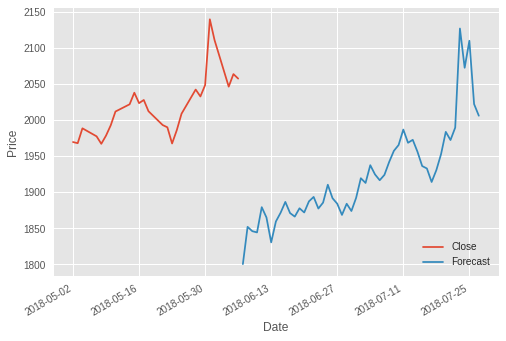

In [13]:
import datetime
import matplotlib.pyplot as plt
from matplotlib import style

style.use('ggplot')

df['Forecast'] = np.nan

last_date = df.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day

for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += 86400
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)]+[i]
    

df=df.truncate(before='2018-05-01')
print(df.head())
    
df['Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()